## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [3]:
import pandas as pd

In [4]:
mov = pd.read_csv('C:/Users/LLerma/Google Drive/Analisis de Datos/M3 - Introduccion a Python/Files/Movielens/movies-separated_by_money-raw.csv', sep = "$")
rat = pd.read_csv('C:/Users/LLerma/Google Drive/Analisis de Datos/M3 - Introduccion a Python/Files/Movielens/ratings-raw.csv')

In [5]:
rat.keys()

Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')

In [6]:
most_ratings = pd.DataFrame(rat.groupby("movie_id")["rating"].agg("count")).sort_values("rating", ascending = False)
most_ratings.head(15)

,rating
movie_id,
2858,3428
260,2991
1196,2990
1210,2883
480,2672
2028,2653
589,2649
2571,2590
1270,2583


In [7]:
# Otra forma

ex = rat.groupby("movie_id").size()
ex[ex>2500].sort_values(ascending = False)

movie_id
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
dtype: int64

In [8]:
rat_2500 = most_ratings[most_ratings["rating"] > 2500]
rat_2500.head(2)

,rating
movie_id,
2858,3428
260,2991


In [9]:
rat_2500

,rating
movie_id,
2858,3428
260,2991
1196,2990
1210,2883
480,2672
2028,2653
589,2649
2571,2590
1270,2583


In [10]:
mov 

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [53]:
top = pd.merge(rat_2500, mov, right_on='movie_id', left_on="movie_id").sort_values("rating", ascending = False)
top

,movie_id,rating,title,genres
0,2858,3428,American Beauty (1999),Comedy|Drama
1,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
2,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
3,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
4,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
5,2028,2653,Saving Private Ryan (1998),Action|Drama|War
6,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
7,2571,2590,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
9,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller


In [34]:
ratings_filtrados_con_nombre = top

In [49]:
a = [1,2,3,4,5]

Pídele a tu experta la función de verificación `visualizar_boxplots` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado. Tu `DataFrame` debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

C:\Otro\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


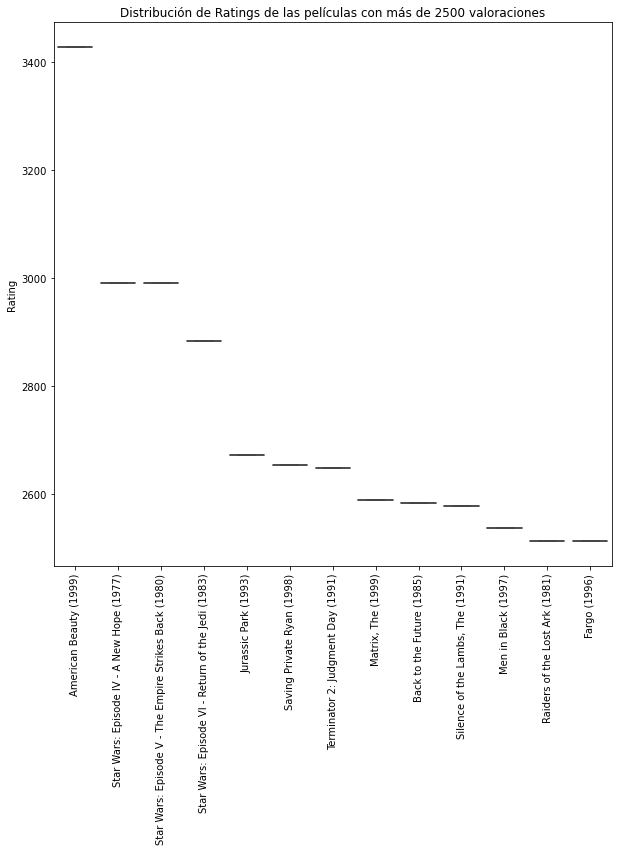

In [35]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)

<details><summary>Solución</summary>

```python
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
conteo_de_valoraciones = ratings['movie_id'].value_counts()
filtro_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones > 2500
conteo_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones[filtro_de_pelis_valoradas_mas_de_2500_veces]
ids_de_pelis_valoradas_mas_de_2500_veces = conteo_de_pelis_valoradas_mas_de_2500_veces.index
def id_esta_en_lista_de_ids(lista_de_ids, id_):
    return id_ in lista_de_ids
filtro_de_ratings = ratings['movie_id'].apply(lambda x: id_esta_en_lista_de_ids(ids_de_pelis_valoradas_mas_de_2500_veces, x))
ratings_filtrados = ratings[filtro_de_ratings]
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movies['title'], left_on='movie_id', right_index=True)
```
    
</details>